In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv',encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
#1.data cleaning
#2.EDA
#3.Text Preprocessing
#4.Model building
#5.Improvements
#7.website

## 1.Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#drop last 3 columns

df1 = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

In [8]:
df1.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [17]:
df1.head(3)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [18]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [19]:
df1['target'] =encoder.fit_transform(df1['target'])

In [20]:
df1.isna().sum()

target    0
text      0
dtype: int64

In [21]:
df.duplicated().sum()

403

In [23]:
df1.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
df1 = df1.drop_duplicates(keep='first')

In [25]:
df1.shape

(5169, 2)

## 2.EDA

In [26]:
df1['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x192bea3ab40>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

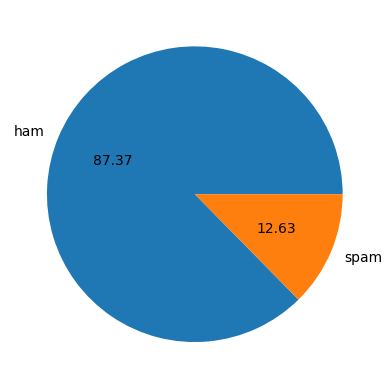

In [27]:
import matplotlib.pyplot as plt
plt.pie(df1['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")


#data is imbalanced

In [28]:
import nltk

In [29]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Masood\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Masood\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [31]:
df1['num_characters'] = df1['text'].apply(len)

In [32]:
df1.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [33]:
df1['num_words'] = df1['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [34]:
df1['num_sentences']=df1['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df1.head(3)


,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2


In [35]:
df1.describe()

,target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [36]:
df1[df1['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [37]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

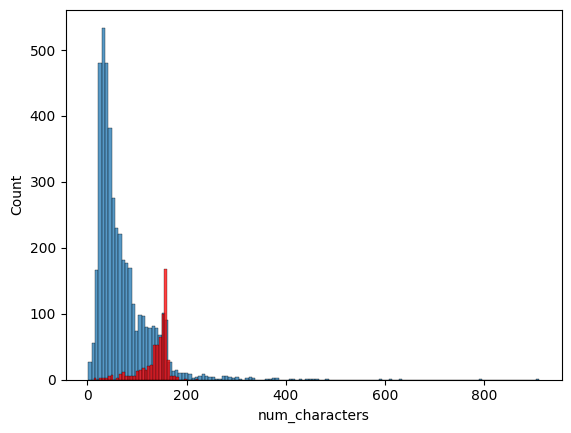

In [38]:
sns.histplot(df1[df1['target'] == 0]['num_characters'])
sns.histplot(df1[df1['target'] == 1]['num_characters'],color='red')


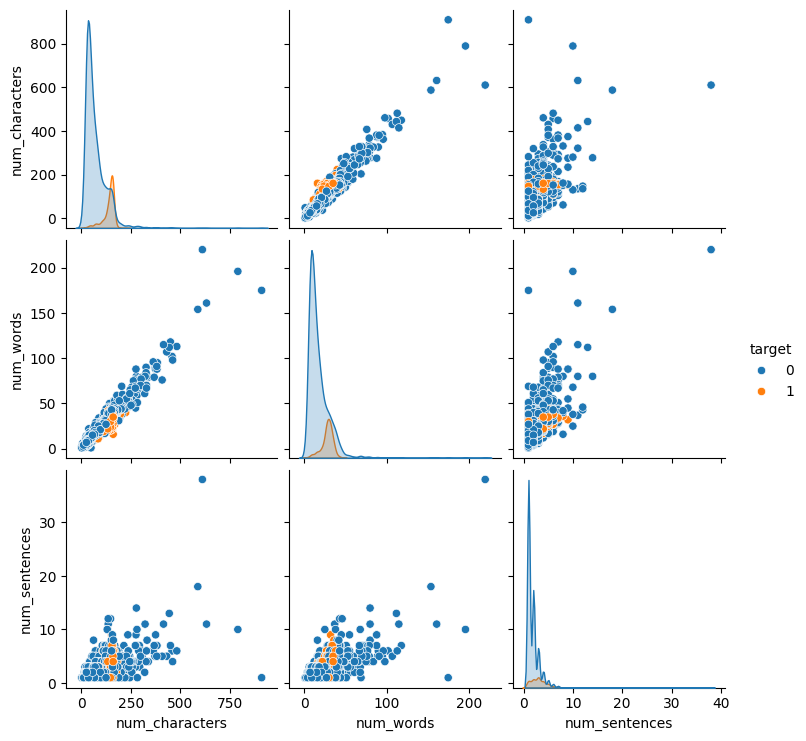

In [39]:
sns.pairplot(df1,hue='target')

<Axes: >

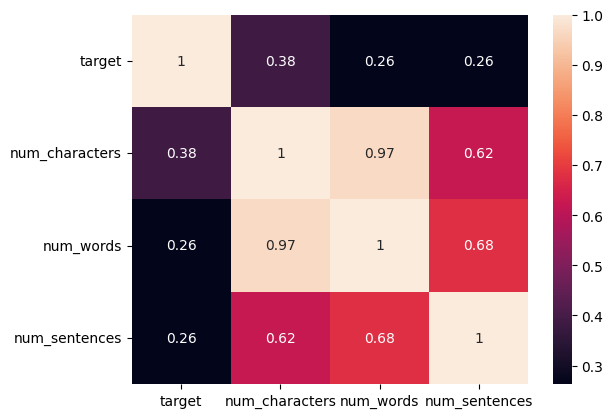

In [40]:
sns.heatmap(df1.corr(numeric_only=True),annot=True)

## 3.Data Preprocessing
##### -lower case
##### -tokenization
##### -Removing special characters
##### -Removing stop words and punctuation
##### -stemming

In [69]:

from string import punctuation


def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [74]:
transform_text(df1['text'][10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [75]:
df1['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [60]:
from nltk.corpus import stopwords
# stopwords.words('english')
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [45]:
df1['text'][1000]

'No..but heard abt tat..'

In [68]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [78]:
# df1['transformed_text'] = 
df1['transformed_text'] = df1['text'].apply(transform_text) 

In [80]:
df1.head(1)

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...


In [86]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [89]:
spam_wc = wc.generate(df1[df1['target'] ==1]['transformed_text'].str.cat(sep=" "))

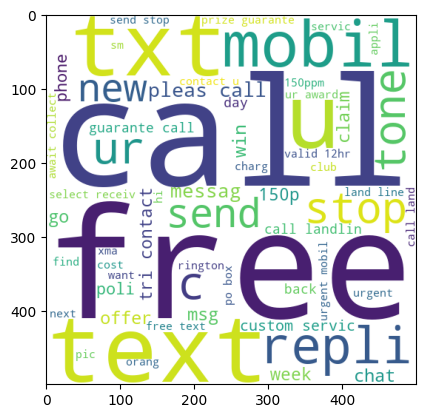

In [90]:
plt.imshow(spam_wc)

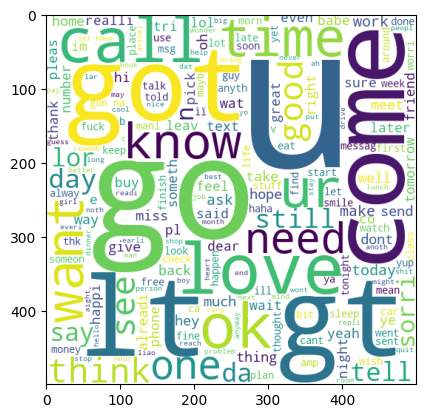

In [92]:
ham_wc = wc.generate(df1[df1['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [97]:
spam_corpus = []
for msg in df1[df1['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [98]:
len(spam_corpus)

9939

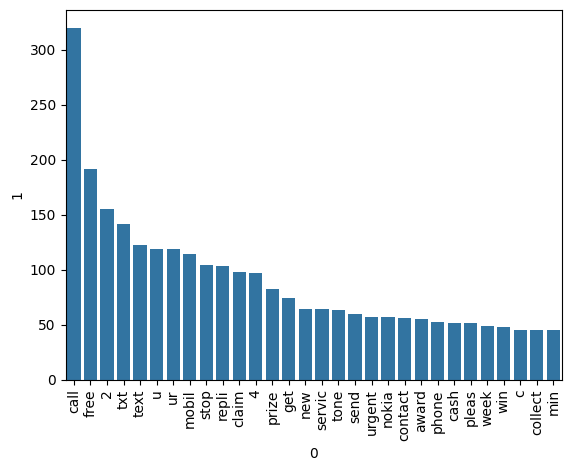

In [106]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [107]:
ham_corpus = []
for msg in df1[df1['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [108]:
len(ham_corpus)

35404

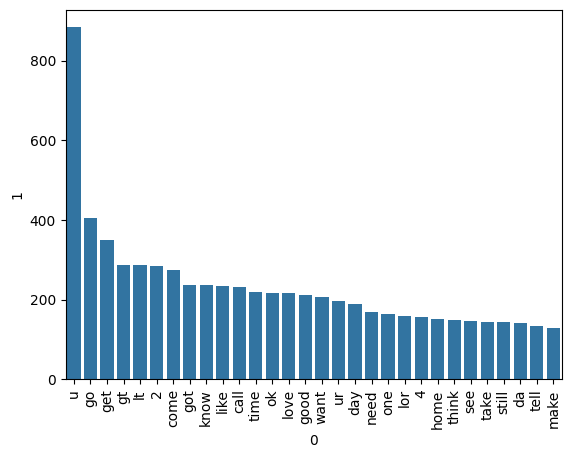

In [109]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## 4.Model Building

In [140]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [141]:
x = tfidf.fit_transform(df1['transformed_text']).toarray()

In [142]:
x.shape

(5169, 3000)

In [143]:
y = df1['target'].values

In [144]:
from sklearn.model_selection import train_test_split

In [145]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [146]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [147]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [148]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [151]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [150]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [152]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))